NaNs in X: 1834
Infs in X: 5838
Max value in X: inf
Min value in X: 0.0
Train: (229726, 19) Label
Benign           165044
Infilteration     64682
Name: count, dtype: int64
Val:   (49227, 19) Label
Benign           35367
Infilteration    13860
Name: count, dtype: int64
Test:  (49228, 19) Label
Benign           35367
Infilteration    13861
Name: count, dtype: int64
Train: (330088, 19) Label
Benign           165044
Infilteration    165044
Name: count, dtype: int64
Accuracy: 0.6713
Precision: 0.4285
Recall: 0.5020
F1 Score: 0.4623
Confusion Matrix:
[[26086  9281]
 [ 6902  6958]]
['Benign' 'Infilteration']


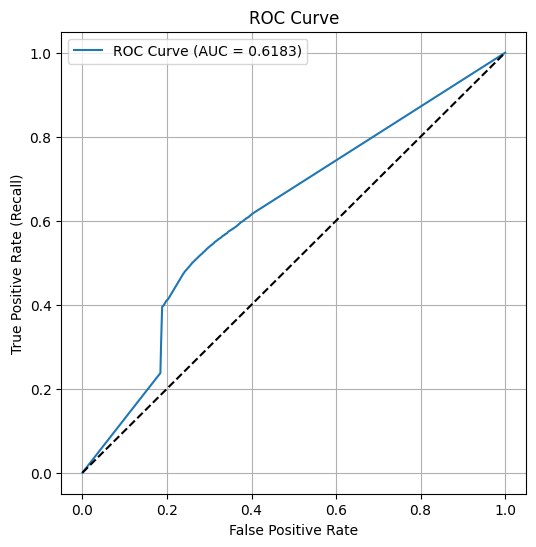

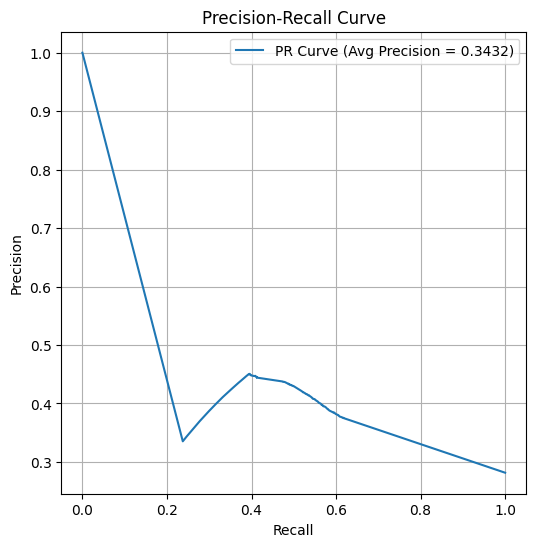

✅ Model saved to models/decision_tree_model.joblib
✅ ROC curve saved to output/roc_curve.png
✅ PR curve saved to output/precision_recall_curve.png


In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Khalil Abbasi/Desktop/Codes/IDS-Detection/Notebooks/cleaned_dataset_reduced.csv")

X = df.drop("Label", axis=1)

y = df["Label"]
df.head()

print("NaNs in X:", X.isnull().sum().sum())
print("Infs in X:", (~np.isfinite(X)).sum().sum())

print("Max value in X:", X.max().max())
print("Min value in X:", X.min().min())

X.replace([np.inf, -np.inf], np.nan, inplace=True)

X.dropna(inplace=True)
y = y[X.index]  # make sure labels match the cleaned X



from sklearn.model_selection import train_test_split

# First split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

# Then split temp into val/test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

from imblearn.over_sampling import SMOTE

# Apply SMOTE on training set only
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



print("Train:", X_train.shape, y_train.value_counts())
print("Val:  ", X_val.shape, y_val.value_counts())
print("Test: ", X_test.shape, y_test.value_counts())
print("Train:", X_train_res.shape, y_train_res.value_counts())


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Create the model
clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)


# 2. Train on training data
#clf.fit(X_train, y_train)
clf.fit(X_train_res, y_train_res)

# 3. Predict on validation set
y_val_pred = clf.predict(X_val)

# 4. Evaluate
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, pos_label="Infilteration")
rec = recall_score(y_val, y_val_pred, pos_label="Infilteration")
f1 = f1_score(y_val, y_val_pred, pos_label="Infilteration")

# 5. Print results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# 6. Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred, labels=["Benign", "Infilteration"]))

y_val_probs = clf.predict_proba(X_val)[:, 1]  # Probability of "Infilteration"
print(clf.classes_)  # Should be ['Benign' 'Infilteration']

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt



fpr, tpr, _ = roc_curve(y_val, y_val_probs, pos_label="Infilteration")
roc_auc = roc_auc_score(y_val, y_val_probs)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


prec, rec, _ = precision_recall_curve(y_val, y_val_probs, pos_label="Infilteration")
avg_prec = average_precision_score(y_val, y_val_probs, pos_label="Infilteration")

plt.figure(figsize=(6, 6))
plt.plot(rec, prec, label=f"PR Curve (Avg Precision = {avg_prec:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


import os
import joblib
import matplotlib.pyplot as plt

# 1. Create folders if they don't exist
os.makedirs("models", exist_ok=True)
os.makedirs("output", exist_ok=True)

# 2. Save the trained model
joblib.dump(clf, "models/decision_tree_model.joblib")
print("✅ Model saved to models/decision_tree_model.joblib")

# 3. Save the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("output/roc_curve.png")
plt.close()
print("✅ ROC curve saved to output/roc_curve.png")

# 4. Save the Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(rec, prec, label=f"PR Curve (Avg Precision = {avg_prec:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.savefig("output/precision_recall_curve.png")
plt.close()
print("✅ PR curve saved to output/precision_recall_curve.png")




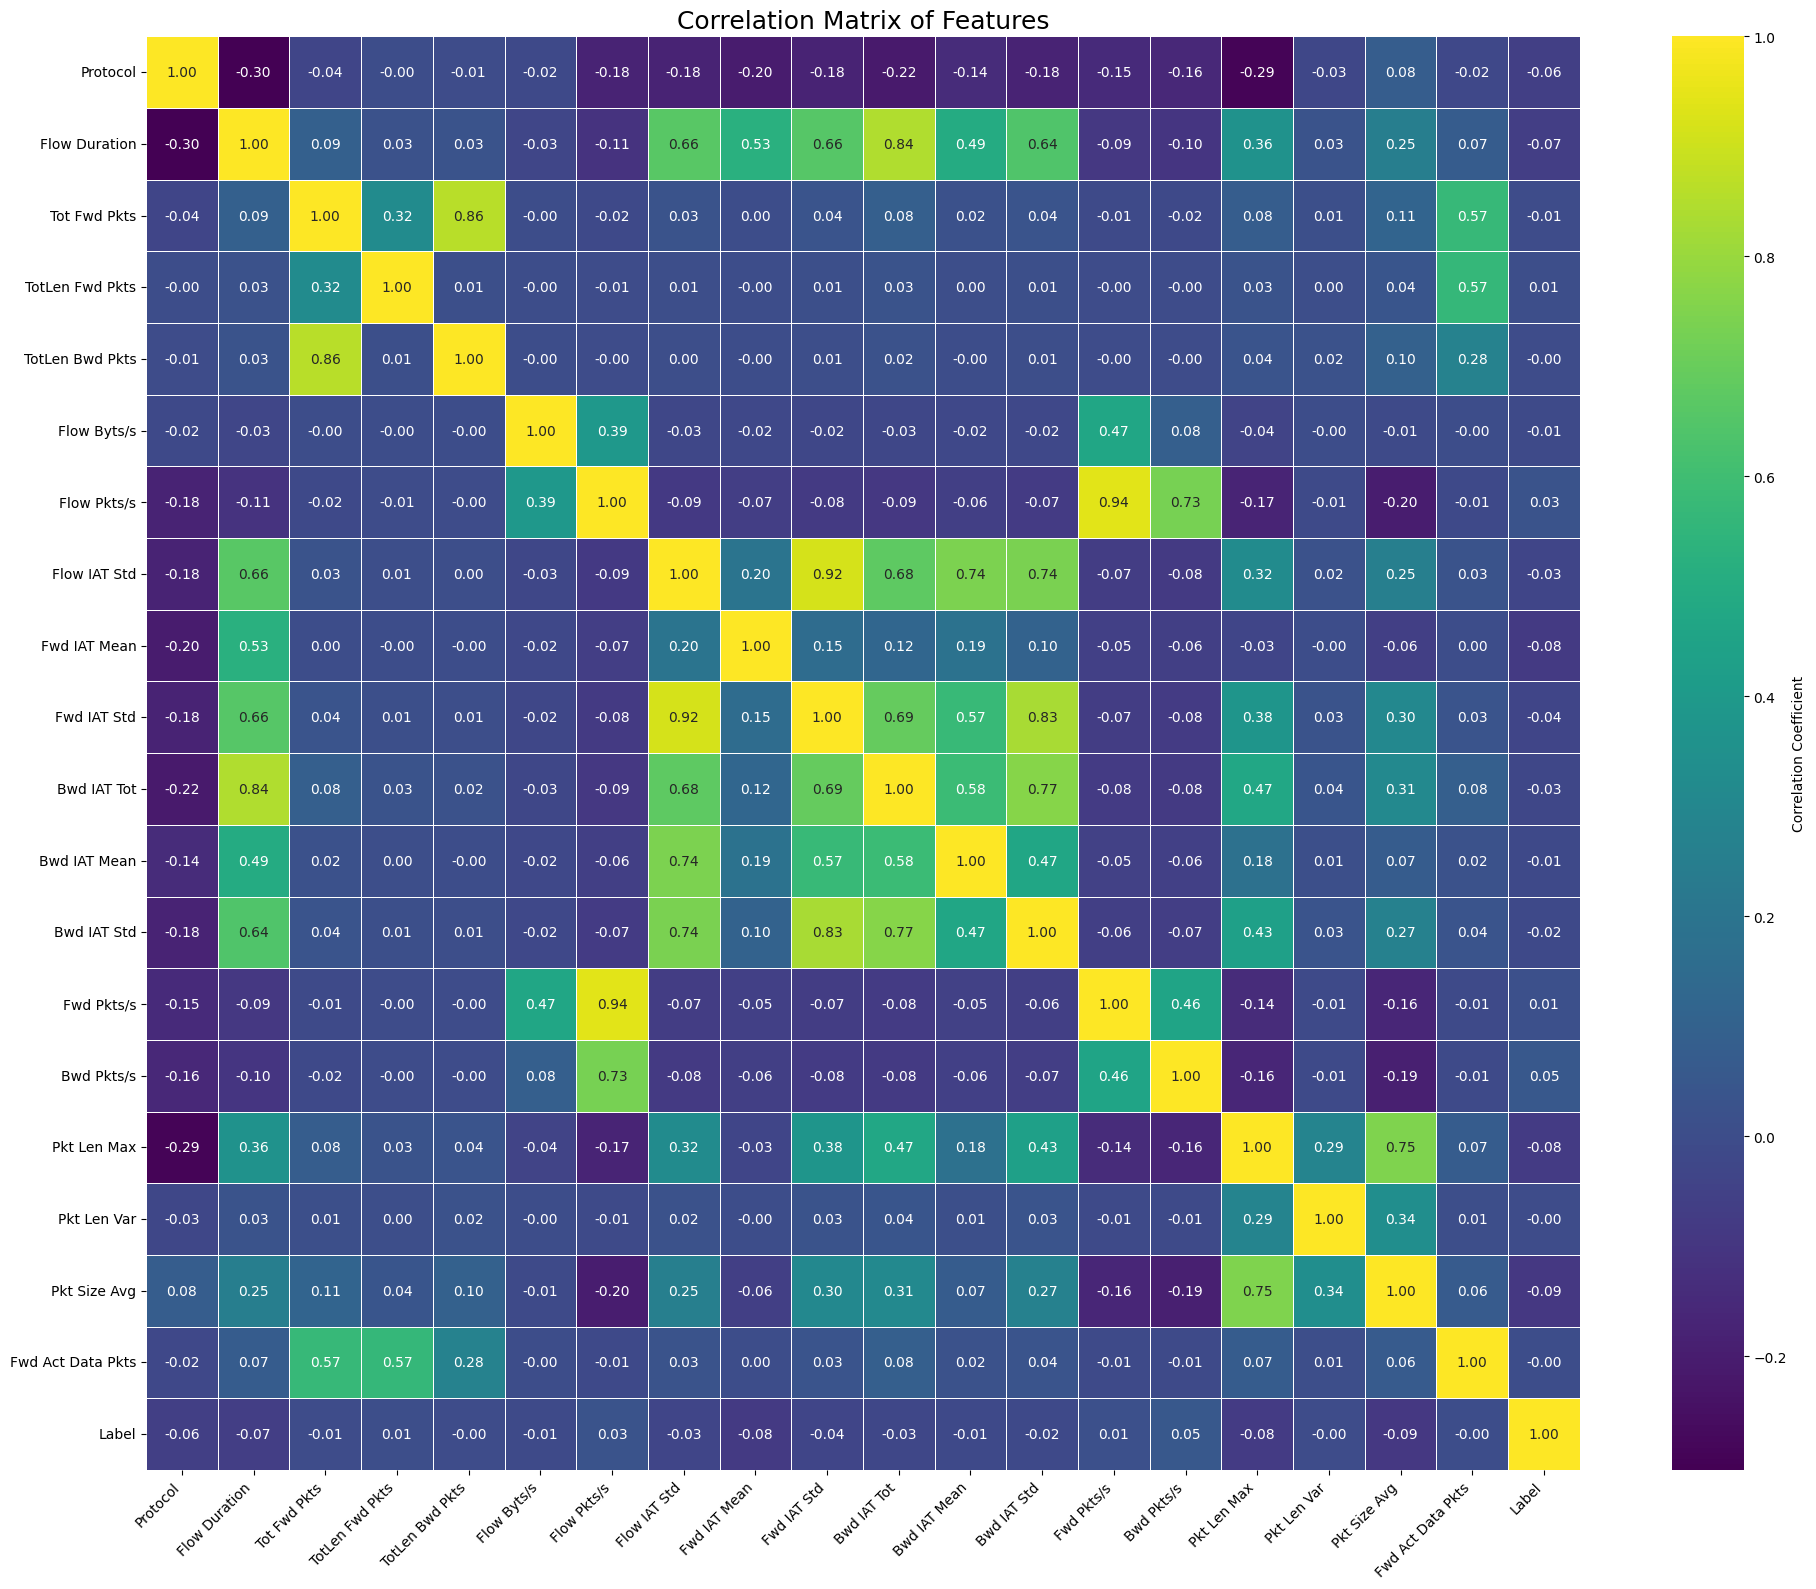

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Khalil Abbasi/Desktop/Codes/IDS-Detection/Notebooks/cleaned_dataset_reduced.csv")


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If you already dropped the label column
# df = X.copy()
# If you still have it in the main dataframe:
# df = your full DataFrame (with Label included)

# Optional: Include target column (Label) if you want to check correlation with target too
df_copy = df.copy()
df_copy["Label"] = y
df_copy["Label"] = df_copy["Label"].map({"Benign": 0, "Infilteration": 1})  # adjust if needed

# Compute correlation matrix
corr = df_copy.corr(numeric_only=True)

# Plot
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format numbers to 2 decimal places
    cmap="viridis",        # Similar color scheme
    square=True,           # Make cells square like your image
    cbar_kws={'label': 'Correlation Coefficient'},  # Color bar label
    linewidths=0.5,        # Thin lines between squares
    linecolor='white'      # Make lines white for clarity
)

plt.title("Correlation Matrix of Features", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



In [15]:
import joblib
joblib.dump(clf, "models/decision_tree_model.joblib")


FileNotFoundError: [Errno 2] No such file or directory: 'models/decision_tree_model.joblib'